#Preprossecing (install dependencies, preparing data, create environment & check profits doing random positions)

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5MB 41kB/s 
     |████████████████████████████████| 412.3MB 40kB/s 
     |████████████████████████████████| 245kB 49.5MB/s 
     |████████████████████████████████| 174kB 50.4MB/s 
     |████████████████████████████████| 3.8MB 45.7MB/s 
     |████████████████████████████████| 512kB 48.4MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=a6c895a26e01b05f3a234cb42f119a25632e4f112f9d2b822808decfb93f85b2
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.0 which is incompatible.
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully un

In [ ]:
%%bash
git clone https://github.com/AminHP/gym-anytrading
cd gym-anytrading; pip install -e .


Obtaining file:///content/gym-anytrading
  Found existing installation: gym-anytrading 1.2.0
    Uninstalling gym-anytrading-1.2.0:
      Successfully uninstalled gym-anytrading-1.2.0
  Running setup.py develop for gym-anytrading


Cloning into 'gym-anytrading'...


In [ ]:
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout,Flatten
from tensorflow.keras import Sequential
#from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [ ]:
df["Date"] = pd.to_datetime(df["Timestamp"],unit="s").dt.date
df=df.groupby("Date").mean()
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Date,,,,,,,,
2011-12-31,1325346930,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,1325419170,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,1325505570,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,1325591970,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,1325678370,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [ ]:
df = df.drop(columns=['Timestamp', 'Volume_(Currency)', 'Weighted_Price'])

In [ ]:
df

,Open,High,Low,Close,Volume_(BTC)
Date,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807
...,...,...,...,...,...
2021-03-27,55193.240643,55219.665031,55168.757372,55195.415367,1.823877
2021-03-28,55833.608471,55857.735342,55810.425126,55835.012863,1.447939
2021-03-29,56914.886595,56946.213593,56885.242967,56915.629993,3.732887


In [ ]:
df = df.rename(columns = {'Volume_(BTC)': 'Volume'}, inplace = False)

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807
...,...,...,...,...,...
2021-03-27,55193.240643,55219.665031,55168.757372,55195.415367,1.823877
2021-03-28,55833.608471,55857.735342,55810.425126,55835.012863,1.447939
2021-03-29,56914.886595,56946.213593,56885.242967,56915.629993,3.732887


In [ ]:
import gym
import gym_anytrading


env = gym.make('stocks-v0', df = df, window_size =20, frame_bound = (20,len(df)))

In [ ]:
env.action_space

Discrete(2)

info: {'total_reward': 40297.13498703863, 'total_profit': 0.0006216381760905948, 'position': 1}


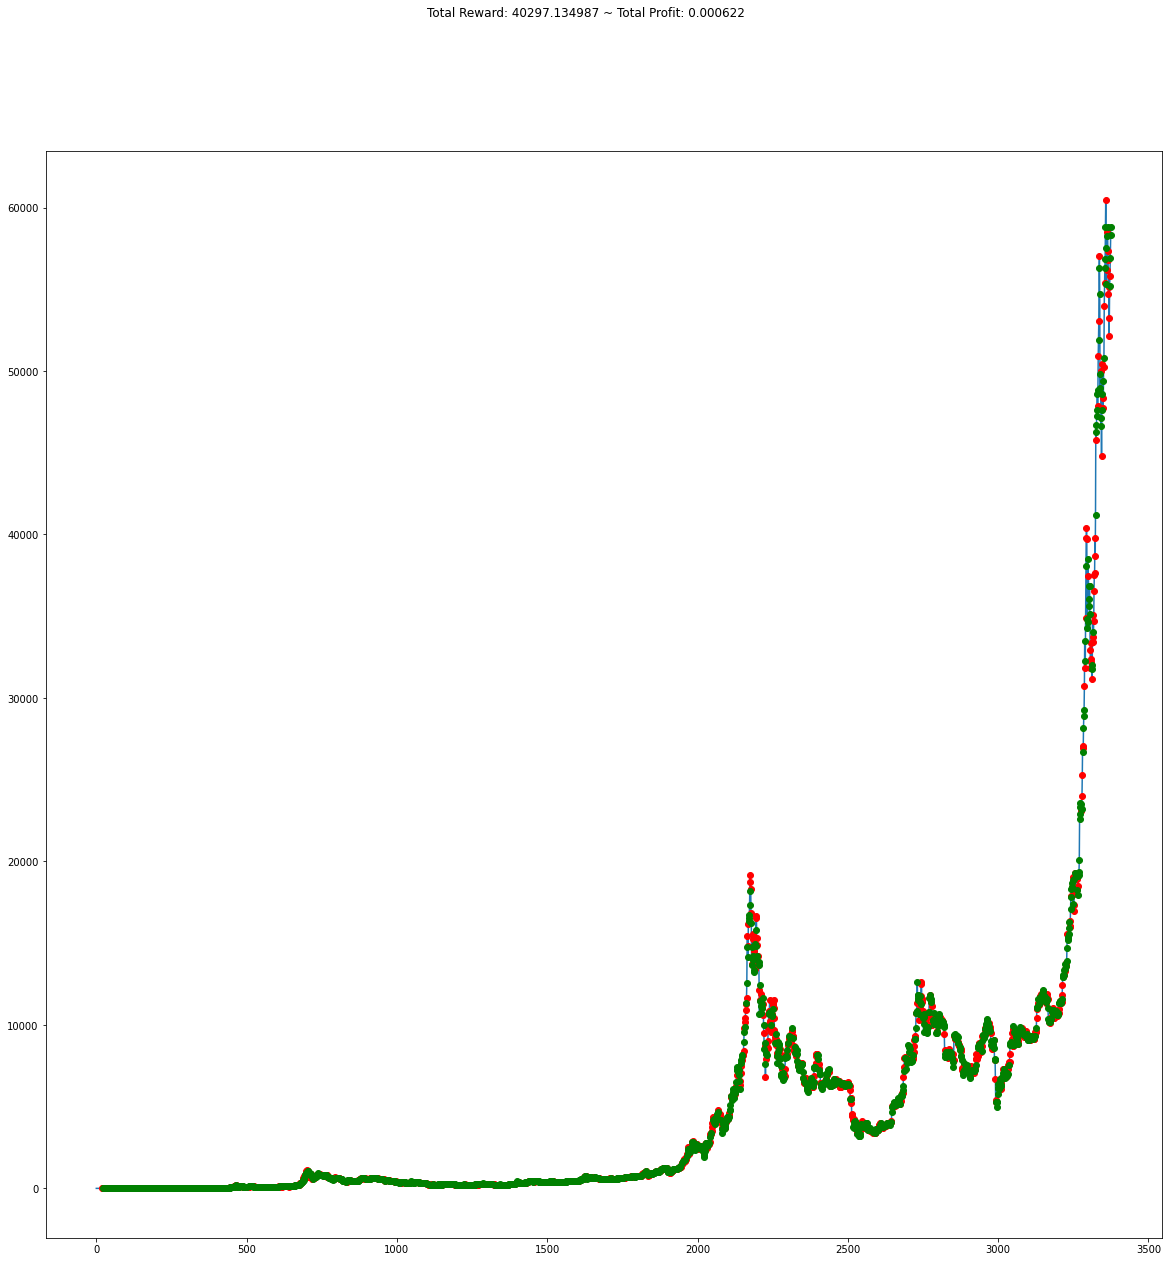

In [ ]:
observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # env.render()
    if done:
        print("info:", info)
        break
plt.figure(figsize=(20,20))
plt.cla()
env.render_all()
plt.show()

In [ ]:
!pip install A2C

ERROR: Could not find a version that satisfies the requirement A2C (from versions: none)
ERROR: No matching distribution found for A2C


In [ ]:
!pip install tensorflow.contrib

ERROR: Could not find a version that satisfies the requirement tensorflow.contrib (from versions: none)
ERROR: No matching distribution found for tensorflow.contrib


In [ ]:
!pip install stable_baselines

     |████████████████████████████████| 245kB 30.2MB/s 


In [ ]:
# !pip install tensorflow==1.14.0
# !pip install stable-baselines[mpi]==2.10.0
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.policies import MlpPolicy, CnnPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import A2C, ACER
from stable_baselines.common.vec_env import DummyVecEnv
import os
from stable_baselines.bench import Monitor 

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as pl

#BTC_trade_class

In [ ]:
class BTC_agent:

  def __init__(self, time_window, RL_alg, RL_net, log_path, df):
    self.time_window = time_window
    self.RL_alg = RL_alg
    self.RL_net = RL_net
    self.log_path = log_path
    self.df = df

  def make_learn_env(self):

    if self.RL_alg == "PPO1":
        env_maker = lambda: gym.make('stocks-v0', df=self.df, frame_bound=(self.time_window,(len(df)-100)), window_size=self.time_window)
        env = DummyVecEnv([env_maker])

        model = PPO1(self.RL_net, env, verbose=1, tensorboard_log=self.log_path) 
        model.learn(total_timesteps=1000000)
        model.save(f"{self.log_path}/tradebot")

    elif self.RL_alg == "A2C":

        env_maker = lambda: gym.make('stocks-v0', df=self.df, frame_bound=(self.time_window,(len(df)-100)), window_size=self.time_window)
        env = DummyVecEnv([env_maker])

        model = A2C(self.RL_net, env, verbose=1, tensorboard_log=self.log_path) 
        model.learn(total_timesteps=100000)
        model.save(f"{self.log_path}/tradebot")
        self.model = model
        return self.model

    elif self.RL_alg == "ACKTR":

        env_maker = lambda: gym.make('stocks-v0', df=self.df, frame_bound=(self.time_window,(len(df)-100)), window_size=self.time_window)
        env = DummyVecEnv([env_maker])

        model = ACKTR(self.RL_net, env, verbose=1, tensorboard_log=self.log_path) 
        model.learn(total_timesteps=10000)
        model.save(f"{self.log_path}/tradebot")
        self.model = model
        return self.model

    elif self.RL_alg == "TRPO":

        env_maker = lambda: gym.make('stocks-v0', df=self.df, frame_bound=(self.time_window,(len(df)-100)), window_size=self.time_window)
        env = DummyVecEnv([env_maker])

        model = TRPO(self.RL_net, env, verbose=1, tensorboard_log=self.log_path) 
        model.learn(total_timesteps=30000)
        model.save(f"{self.log_path}/tradebot")
        self.model = model
        return self.model

  def evaluate(self):

      env = gym.make('stocks-v0', df=self.df, frame_bound=((len(self.df)-100),len(self.df)), window_size= self.time_window)
      self.env =env
      obs = self.env.reset()
      while True: 
          obs = obs[np.newaxis, ...]
          action, _states = self.model.predict(obs)
          obs, rewards, done, info = self.env.step(action)
          
          if done:
              print("info", info)
              break

  def plot_trade_proccessing(self):

        plt.figure(figsize=(25,10))
        plt.cla()
        self.env.render_all()
        plt.show()
